# Kernel Demo for SVM
In this notebook, I'll show a demo the usefulness of kernels from the SVM's point of view. First, let us import related Python packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm


Now, we are going to define a function to visualize our samples on feature space, and different classes will be shown in different colors.

In [2]:
def plotclasses(x,y,plottitle='Plot classes on feature domain'):
    ## Plot data
    fig=plt.figure()
    if np.shape(x)[1]==2:
        plt.scatter(x[y,0],x[y,1],marker='.', color='r',alpha=0.5,label='Red Class')
        plt.scatter(x[~y,0],x[~y,1],marker='.', color='g',alpha=0.5, label='Green Class')
    elif np.shape(x)[1]==3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[y,0],x[y,1],zs=x[y,2],marker='.', color='r',alpha=0.5,label='Red Class')
        ax.scatter(x[~y,0],x[~y,1],zs=x[~y,2],marker='.', color='g',alpha=0.5, label='Green Class')
        ax.set_zlabel('X_3')
        
    
    
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title(plottitle)
    plt.legend()
    plt.show()

We are going to generate our own dataset here. The dataset X is an N-by-2 variable, which means N number of samples with two features. Samples are uniformly spaced in a square region, and class-one will be those samples which fall inside a predefined circle. We will also plot the samples using the previous plotting function.

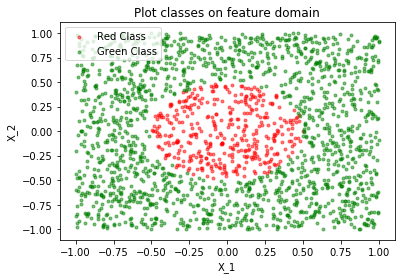

In [3]:
# Generate data
N=2000;
x=np.random.uniform(-1,1,(N,2))
y=np.sqrt(x[:,0]**2+x[:,1]**2)<0.5
plotclasses(x,y)

Now, we are going to classify this dataset using linear SVM. It is clear that we will not be successful as the dataset is not linearly separable in the feature space. In the result, we will see that all samples are classified as the green class.

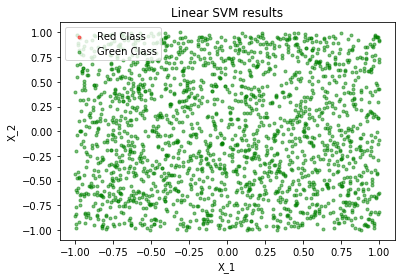

In [4]:
## Linear SVM classification

clf = svm.LinearSVC()
clf.fit(x, y)
yest=clf.predict(x)
plotclasses(x,yest,'Linear SVM results')

If we can introduce a new feature in such a way that the classes are separable by a hyperplane in the feature space then we should achieve better results. Now, we introduce a new feature using a function (kernel) x3=sqrt(x1^2+x2^2). Hopefully, this will make the classes linearly separable in the feature space.

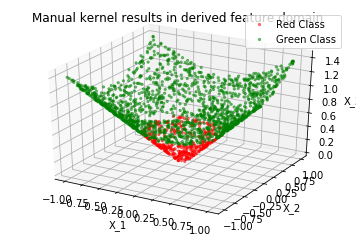

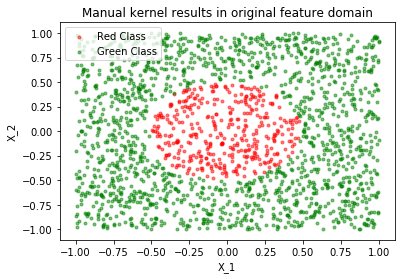

In [9]:
# Manually introduce a kernel
X=np.zeros((N,3))
X[:,0:2]=x
X[:,2]=(x[:,0]**2+x[:,1]**2)**0.5

clf2 = svm.LinearSVC()
clf2.fit(X, y)
Yest=clf2.predict(X)
plotclasses(X,Yest,'Manual kernel results in derived feature domain')
plotclasses(x,Yest,'Manual kernel results in original feature domain')

We clearly see that in the three-dimensional feature space, now red and green classes are linearly separable.
To make classes separable in feature space, SVM has a few kernel tricks, and RBF is one of them. Now, we are going to classify this dataset using RBF based SVM.

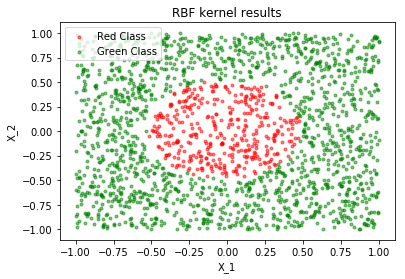

In [6]:
# Using RBF kernels

clf3 = svm.SVC()
clf3.fit(x, y)
yrbf=clf3.predict(x)
plotclasses(x,yrbf,'RBF kernel results')


If we see the properties of the last SVM model, we can see that the kernel type is 'rbf'. We can use poly and linear kernel as well in this SVM implementation.

In [7]:
clf3

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)